# Sales Dataset Analysis

This notebook provides an initial structure for exploring and analyzing the `sales_data.csv` dataset.

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

## 2. Load Dataset

In [3]:
df = pd.read_csv('../data/raw/sales_data.csv')
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


## 3. Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [4]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


## 4. Missing Values

In [5]:
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

## 5. Basic Exploration

In [6]:
# Example: Total Sales by Region
region_sales = df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False)
region_sales

Region
North    1369612.51
East     1259792.93
West     1235608.93
South    1154250.86
Name: Sales_Amount, dtype: float64

## 6. Visualizations

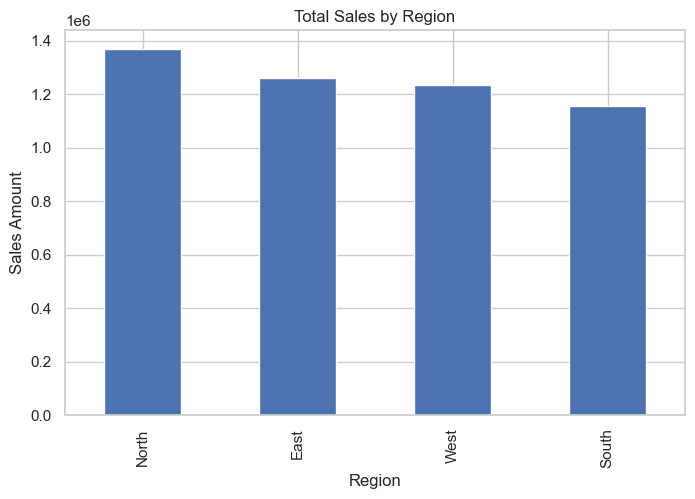

In [7]:
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.ylabel('Sales Amount')
plt.show()

## Extra

In [10]:
# Convert Sale_Date column to datetime
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Sale_Date'].dt.year.head()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: Sale_Date, dtype: int32

In [13]:
# Extract year, month and day from the Sale_Date column
df['Year'] = df['Sale_Date'].dt.year
df['Month'] = df['Sale_Date'].dt.month
df['Day'] = df['Sale_Date'].dt.day
df[['Sale_Date', 'Year', 'Month', 'Day']].head()

,Sale_Date,Year,Month,Day
0,2023-02-03,2023,2,3
1,2023-04-21,2023,4,21
2,2023-09-21,2023,9,21
3,2023-08-24,2023,8,24
4,2023-03-24,2023,3,24


In [15]:
# Check for inconsistencies on Region, Sales_Rep anbd Product_Category columns
print(df['Region'].unique())
print(df['Sales_Rep'].unique())
print(df['Product_Category'].unique())

['North' 'West' 'South' 'East']
['Bob' 'David' 'Charlie' 'Eve' 'Alice']
['Furniture' 'Food' 'Clothing' 'Electronics']


In [27]:
# New columns
df['Gross_Revenue'] = round(df['Unit_Price'] * df['Quantity_Sold'],2)
df['Discount_Value'] = round(df['Gross_Revenue'] * df['Discount'],2)
df['Net_Revenue'] = round(df['Gross_Revenue'] - df['Discount_Value'],2)
df['Profit'] = round(df['Net_Revenue'] - (df['Unit_Cost'] * df['Quantity_Sold']),2)
df[['Product_ID','Unit_Price', 'Unit_Cost', 'Quantity_Sold', 'Discount', 'Gross_Revenue', 'Discount_Value', 'Net_Revenue', 'Profit']].head()

,Product_ID,Unit_Price,Unit_Cost,Quantity_Sold,Discount,Gross_Revenue,Discount_Value,Net_Revenue,Profit
0,1052,267.22,152.75,18,0.09,4809.96,432.90,4377.06,1627.56
1,1093,4209.44,3816.39,17,0.11,71560.48,7871.65,63688.83,-1189.80
2,1015,371.40,261.56,30,0.20,11142.00,2228.40,8913.60,1066.80
3,1072,4467.75,4330.03,39,0.02,174242.25,3484.84,170757.41,1886.24
4,1061,692.71,637.37,13,0.08,9005.23,720.42,8284.81,-1.00


In [21]:
# More groups
df.groupby('Month')['Net_Revenue'].sum()

Month
1     6421950.98
2     4662249.49
3     5111669.97
4     4518199.68
5     4878261.79
6     5296111.99
7     4003580.28
8     5724989.75
9     3835193.07
10    5678169.61
11    4157584.67
12    5398212.03
Name: Net_Revenue, dtype: float64

In [22]:
df.groupby('Product_Category')['Profit'].sum()

Product_Category
Clothing      -1212931.53
Electronics    -843495.22
Food           -912451.38
Furniture     -1187042.20
Name: Profit, dtype: float64

In [30]:
df.groupby('Sales_Rep')['Profit'].sum().sort_values(ascending=False)

Sales_Rep
Alice      -626262.51
Charlie    -653165.03
Bob        -773124.22
Eve        -883943.57
David     -1219425.00
Name: Profit, dtype: float64

In [24]:
df.groupby(['Region', 'Sales_Rep'])['Net_Revenue'].sum()

Region  Sales_Rep
East    Alice        3264875.83
        Bob          3112006.63
        Charlie      2316519.47
        David        3460735.11
        Eve          3048145.19
North   Alice        2766284.62
        Bob          2808246.68
        Charlie      2516513.85
        David        4107046.41
        Eve          3372250.62
South   Alice        3003526.18
        Bob          2452402.56
        Charlie      2079864.28
        David        2914547.26
        Eve          3444320.02
West    Alice        2441958.94
        Bob          3396047.85
        Charlie      2914793.26
        David        3192080.41
        Eve          3074008.14
Name: Net_Revenue, dtype: float64

In [33]:
df['Discount'].mean()

0.15239

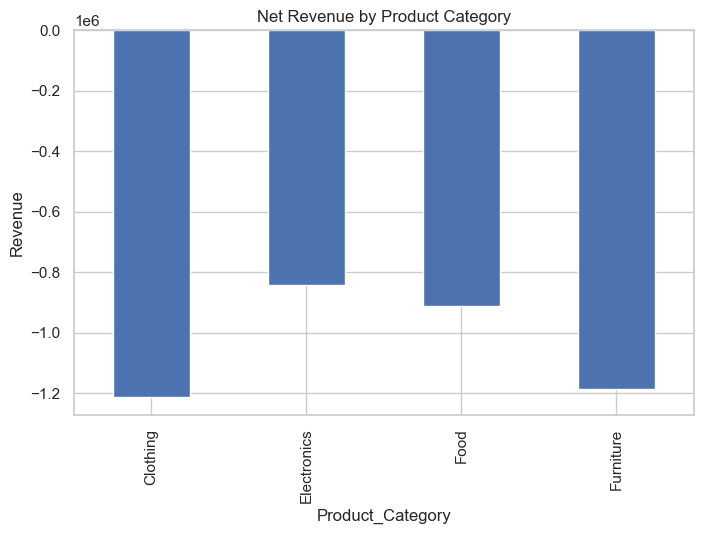

In [31]:
# Net Revenue by Product Category
plt.figure(figsize=(8,5))
df.groupby('Product_Category')['Profit'].sum().plot(kind='bar')
plt.title("Net Revenue by Product Category")
plt.ylabel("Revenue")
plt.show()

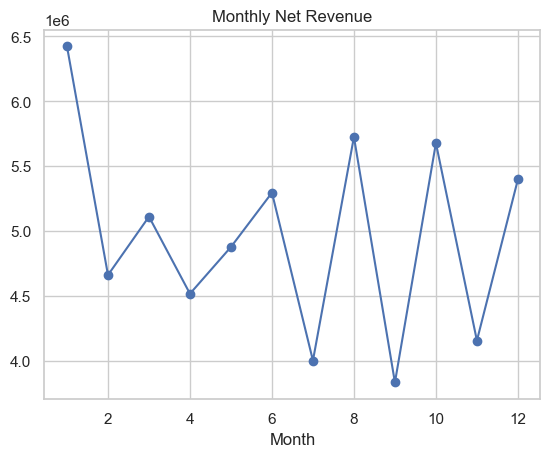

In [29]:
# Monthly Net Revenue
df.groupby('Month')['Net_Revenue'].sum().plot(kind='line', marker='o')
plt.title("Monthly Net Revenue")
plt.show()

## Summary of Findings
1) What is the region with more sales? Answer: North
3) Which sales rep had the best performance? Answer: Alice
4) What category had more profit? Answer: Electronics
5) Seasonality exist in this data? Answer: January with the highest monthly net revenue and September with the lowest.
6) Average discount applied? Answer: 0.15239